In [5]:
import cv2
import numpy as np
from cv2 import boundingRect, countNonZero, cvtColor, drawContours, findContours, getStructuringElement, imread, morphologyEx, pyrDown, rectangle, threshold

large = imread("nameplate.jpg")
# downsample and use it for processing
rgb = pyrDown(large)
# apply grayscale
small = cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# morphological gradient
morph_kernel = getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = morphologyEx(small, cv2.MORPH_GRADIENT, morph_kernel)
# binarize
_, bw = threshold(src=grad, thresh=0, maxval=255, type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)
morph_kernel = getStructuringElement(cv2.MORPH_RECT, (9, 1))
# connect horizontally oriented regions
connected = morphologyEx(bw, cv2.MORPH_CLOSE, morph_kernel)
mask = np.zeros(bw.shape, np.uint8)
# find contours
im2, contours, hierarchy = findContours(connected, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# filter contours
for idx in range(0, len(hierarchy[0])):
    rect = x, y, rect_width, rect_height = boundingRect(contours[idx])
    # fill the contour
    mask = drawContours(mask, contours, idx, (255, 255, 2555), cv2.FILLED)
    # ratio of non-zero pixels in the filled region
    r = float(countNonZero(mask)) / (rect_width * rect_height)
    if r > 0.45 and rect_height > 8 and rect_width > 8:
        rgb = rectangle(rgb, (x, y+rect_height), (x+rect_width, y), (0,255,0),3)

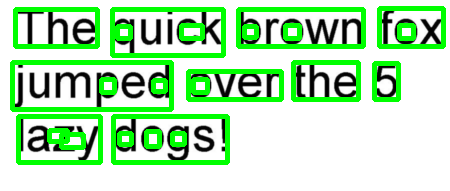

In [7]:
from PIL import Image
display(Image.fromarray(rgb))
